In [5]:
import pandas
import numpy as np
df = pandas.read_csv("Saturday, April 02, 2016")
df.columns = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','IN','OUT']
df = df[['UNIT', 'SCP', 'DATE', 'TIME', "IN", "OUT"]]
df.head(5)

,UNIT,SCP,DATE,TIME,IN,OUT
0,R051,02-00-00,03/26/2016,00:00:00,5595746,1893277
1,R051,02-00-00,03/26/2016,04:00:00,5595746,1893282
2,R051,02-00-00,03/26/2016,08:00:00,5595746,1893282
3,R051,02-00-00,03/26/2016,12:00:00,5595746,1893282
4,R051,02-00-00,03/26/2016,16:00:00,5595746,1893282


In [6]:
geocode = pandas.read_csv('geocoded.csv', header=None)
geocode = geocode.drop_duplicates(0)
geocode = geocode[[0,5,6]]
geocode.columns = ['UNIT', 'LAT', 'LON']
geocode_mapping = {row.values[0]:[row[1], row[2]] for index,row in geocode.iterrows()}

In [7]:
def map(unit):
    try:
        return geocode_mapping[unit]
    except:
        return np.nan

df['COORD'] = df['UNIT'].apply(map)

In [8]:
df.head(20)

,UNIT,SCP,DATE,TIME,IN,OUT,COORD
0,R051,02-00-00,03/26/2016,00:00:00,5595746,1893277,"[40.762796, -73.967686]"
1,R051,02-00-00,03/26/2016,04:00:00,5595746,1893282,"[40.762796, -73.967686]"
2,R051,02-00-00,03/26/2016,08:00:00,5595746,1893282,"[40.762796, -73.967686]"
3,R051,02-00-00,03/26/2016,12:00:00,5595746,1893282,"[40.762796, -73.967686]"
4,R051,02-00-00,03/26/2016,16:00:00,5595746,1893282,"[40.762796, -73.967686]"
5,R051,02-00-00,03/26/2016,20:00:00,5595746,1893282,"[40.762796, -73.967686]"
6,R051,02-00-00,03/27/2016,00:00:00,5595746,1893282,"[40.762796, -73.967686]"
7,R051,02-00-00,03/27/2016,04:00:00,5595746,1893282,"[40.762796, -73.967686]"
8,R051,02-00-00,03/27/2016,08:00:00,5595746,1893282,"[40.762796, -73.967686]"
9,R051,02-00-00,03/27/2016,12:00:00,5595746,1893282,"[40.762796, -73.967686]"


In [9]:
import datetime
df["DATETIME"] = df["DATE"]+ ' ' + df["TIME"]

In [10]:
df["DATETIME"] = pandas.to_datetime(df["DATETIME"])

In [11]:
day = []
for i in range(0,df["DATETIME"].shape[0]):
    if df["DATETIME"][i].isoweekday() in range(1,6):
        day.append("Weekday")
    else:
        day.append("Weekend")

In [12]:
df["DAY"] = day

In [13]:
x = [1,2,3,4,5,6,5000,5001,5002,5003,5004,5005]
df.loc[x]

,UNIT,SCP,DATE,TIME,IN,OUT,COORD,DATETIME,DAY
1,R051,02-00-00,03/26/2016,04:00:00,5595746,1893282,"[40.762796, -73.967686]",2016-03-26 04:00:00,Weekend
2,R051,02-00-00,03/26/2016,08:00:00,5595746,1893282,"[40.762796, -73.967686]",2016-03-26 08:00:00,Weekend
3,R051,02-00-00,03/26/2016,12:00:00,5595746,1893282,"[40.762796, -73.967686]",2016-03-26 12:00:00,Weekend
4,R051,02-00-00,03/26/2016,16:00:00,5595746,1893282,"[40.762796, -73.967686]",2016-03-26 16:00:00,Weekend
5,R051,02-00-00,03/26/2016,20:00:00,5595746,1893282,"[40.762796, -73.967686]",2016-03-26 20:00:00,Weekend
6,R051,02-00-00,03/27/2016,00:00:00,5595746,1893282,"[40.762796, -73.967686]",2016-03-27 00:00:00,Weekend
5000,R170,03-00-00,04/01/2016,09:00:00,1288655,9042769,"[40.734836, -73.990688]",2016-04-01 09:00:00,Weekday
5001,R170,03-00-00,04/01/2016,13:00:00,1288729,9044085,"[40.734836, -73.990688]",2016-04-01 13:00:00,Weekday
5002,R170,03-00-00,04/01/2016,17:00:00,1288970,9045642,"[40.734836, -73.990688]",2016-04-01 17:00:00,Weekday
5003,R170,03-00-00,04/01/2016,21:00:00,1289235,9047852,"[40.734836, -73.990688]",2016-04-01 21:00:00,Weekday


In [41]:
masterDF = pandas.DataFrame(columns=['UNIT', 'IN', 'OUT', 'COORDS'])
for unit, groupA in df.groupby(['UNIT']):
    stationDF = pandas.DataFrame(columns=df.columns)
    for scp, group in groupA.groupby("SCP"):
        #print "KEY:", key
        #print "group:", group

        diff = group["IN"].iloc[1:].values - group["IN"].iloc[:-1].values
        diff = np.concatenate((np.array([0]), diff))
        group['IN'] = diff
        group['IN'].iloc[0] = np.nan

        diff = group["OUT"].iloc[1:].values - group["OUT"].iloc[:-1].values
        diff = np.concatenate((np.array([0]), diff))
        group['OUT'] = diff
        group['OUT'].iloc[0] = np.nan

        #group['FLUX'] = (group['OUT'] / group['IN'] - 1) * (group['IN'] + group['OUT'])
        #group['DIFF'] =  group['OUT'] - group['IN']
    
        stationDF = stationDF.append(group)
        
    weekdays = newDF[newDF.DAY == 'Weekday']
    def classify_time(time):
        if 5 <= time.hour <= 9:
            return "Morning"
        elif 17 < time.hour < 22:
            return "Evening"
        else:
            return None
    weekdays["M_E"] = weekdays['DATETIME'].apply(classify_time)
    mornings = weekdays[weekdays.M_E == 'Morning']
    masterDF.loc[len(masterDF)] = (unit, stationDF['IN'].sum(), 
                                   stationDF['OUT'].sum(), stationDF['COORD'].iloc[0])

    print "STATION FINISHED"


/Library/Python/2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:16: Sett

STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISHED
STATION FINISH

In [43]:
masterDF.to_csv("SaturdayApril022016-Weekday-Mornings")

In [44]:
masterDF

,UNIT,IN,OUT,COORDS
0,R001,187722,186009,"[40.703082, -74.012983]"
1,R003,9866,5665,"[40.689945, -73.872564]"
2,R004,24648,20518,"[40.69132, -73.867135]"
3,R005,24380,11775,"[40.692304, -73.860151]"
4,R006,29903,13105,"[40.693866, -73.851568]"
5,R007,11880,5435,"[40.695184, -73.844326]"
6,R008,16628,9612,"[40.697405, -73.836354]"
7,R009,15543,7822,"[40.700536, -73.828382]"
8,R010,243276,194040,"[40.757303, -73.989787]"
9,R011,281164,244386,"[40.757303, -73.989787]"


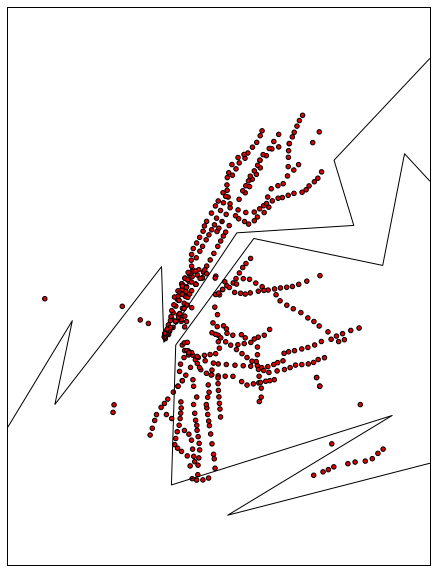

In [90]:
%matplotlib inline
plt.figure(figsize=(10,10))
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-74.2, llcrnrlat=40.5,
    urcrnrlon=-73.7, urcrnrlat=41)
 
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

masterDF = masterDF.dropna(subset=['COORDS'])

# MAKE NEW RBG COLUMN
#if(dim1 >=0):
#    rgb_pos = (255,255-dim1,255-dim1)

mycolmap = plt.get_cmap("jet")
colors = masterDF['OUT'] - masterDF['IN']
coords = list(masterDF['COORDS'])
lon = [coord[0] for coord in coords]
lat = [coord[1] for coord in coords]
x,y = my_map(lat, lon)
plt.scatter(x, y, c=colors, cmap=mycolmap, s=20)

"""
for index, row in masterDF.iterrows():
    unit, IN, OUT, coords = row
    x,y = my_map(lat, lon)
    my_map.plot(x, y, c=1, markersize=3)"""

plt.show()



In [95]:
fcolors = colors.astype('float')

max = 0
print colors.max()
print colors.min()
if colors.max() > colors.min()*-1:
    max = colors.max()
else:
    max = colors.min() * -1
scalingfactor = max
scaledcolors = fcolors/scalingfactor
scaledcolors = np.log(abs(scaledcolors))
scaledcolors = colors < 0
print scaledcolors


6198718.0
-68412983.0
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11     -7.141228
12           NaN
13     -7.889945
14     -8.908154
15     -7.562125
16           NaN
17           NaN
18     -7.646799
19     -9.639964
20           NaN
21     -7.014752
22           NaN
23           NaN
24           NaN
25     -8.361542
26           NaN
27           NaN
28           NaN
29     -6.755224
         ...    
436          NaN
437          NaN
438          NaN
439          NaN
440    -7.519890
441    -8.294356
442    -9.129408
443    -8.840177
444          NaN
445    -7.369725
446          NaN
447          NaN
448          NaN
449          NaN
450          NaN
451          NaN
452          NaN
453          NaN
454          NaN
455    -8.431890
456          NaN
457   -10.477354
458          NaN
459   -10.328182
460   -10.780551
461    -9.876278
462      